In [12]:
import warnings
warnings.filterwarnings('ignore')

import iris
import numpy
import matplotlib.pyplot as plt

In [13]:
vol_file = '/g/data/r87/dbi599/DRSv2/CMIP5/CCSM4/historical/mon/ocean/r1i1p1/volo/latest/volo-tsdist_Omon_CCSM4_historical_r1i1p1_1986-2005-monthly-clim_south-atlantic.nc'
so_file = '/g/data/r87/dbi599/DRSv2/CMIP5/CCSM4/historical/mon/ocean/r1i1p1/so/latest/so-vs-thetao_Omon_CCSM4_historical_r1i1p1_all_south-atlantic.nc'

In [14]:
vol_cube = iris.load_cube(vol_file)
print(vol_cube.summary(shorten=True))

ocean_volume / (m3)                 (sea_water_salinity: 119; sea_water_potential_temperature: 129)


In [15]:
so_cube = iris.load_cube(so_file)
print(so_cube.summary(shorten=True))

sea_water_salinity / (1)            (year: 156; sea_water_potential_temperature: 129)


In [16]:
x_values = vol_cube.coord('sea_water_salinity').points
y_values = vol_cube.coord('sea_water_potential_temperature').points
extents = [x_values[0], x_values[-1], y_values[0], y_values[-1]]

In [17]:
log_hist = numpy.log(vol_cube.data).T

In [18]:
so_mean = so_cube[-20:, :].collapsed('year', iris.analysis.MEAN)

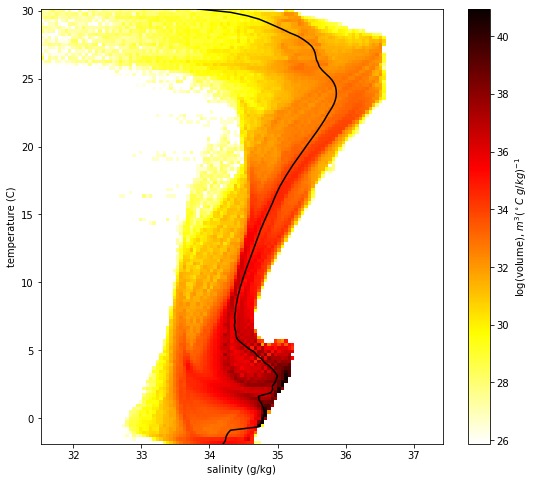

In [19]:
plt.figure(figsize=(9, 8))
plt.imshow(log_hist, origin='lower',
           extent=extents, aspect='auto',
           cmap='hot_r')
plt.plot(so_mean.data, so_cube.coord('sea_water_potential_temperature').points, color='black')
cb = plt.colorbar()
cb.set_label('log(volume), $m^3 (^\circ C \; g/kg)^{-1}$')
plt.xlabel('salinity (g/kg)')
plt.ylabel('temperature (C)')
plt.show()